<a href="https://colab.research.google.com/github/AKASH4671/AI-Powered-Portfolio-Optimization-and-Risk-Management/blob/main/3_Risk_Adjusted_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Data**

In [4]:
# Set your project folder inside Google Drive
data_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Powered-Portfolio-Optimization-and-Risk-Management/data"


# Load CSV files from Google Drive
returns = pd.read_csv(f"{data_path}/daily_returns.csv", index_col=0, parse_dates=True)
weights_sharpe = pd.read_csv(f"{data_path}/optimal_weights_sharpe.csv", index_col=0).squeeze("columns")
weights_minvol = pd.read_csv(f"{data_path}/optimal_weights_minvol.csv", index_col=0).squeeze("columns")

**Align weights with Stock Ticker**

In [14]:
# Align weights with returns columns
weights_sharpe = weights_sharpe.reindex(returns.columns).fillna(0)
weights_minvol = weights_minvol.reindex(returns.columns).fillna(0)


**Compute daily portfolio returns**

In [15]:
# Compute daily portfolio returns
sharpe_returns = returns.dot(weights_sharpe)
minvol_returns = returns.dot(weights_minvol)

**Compute & plot cumulative returns**

In [16]:
# Compute cumulative returns
sharpe_cum = (1 + sharpe_returns).cumprod()
minvol_cum = (1 + minvol_returns).cumprod()

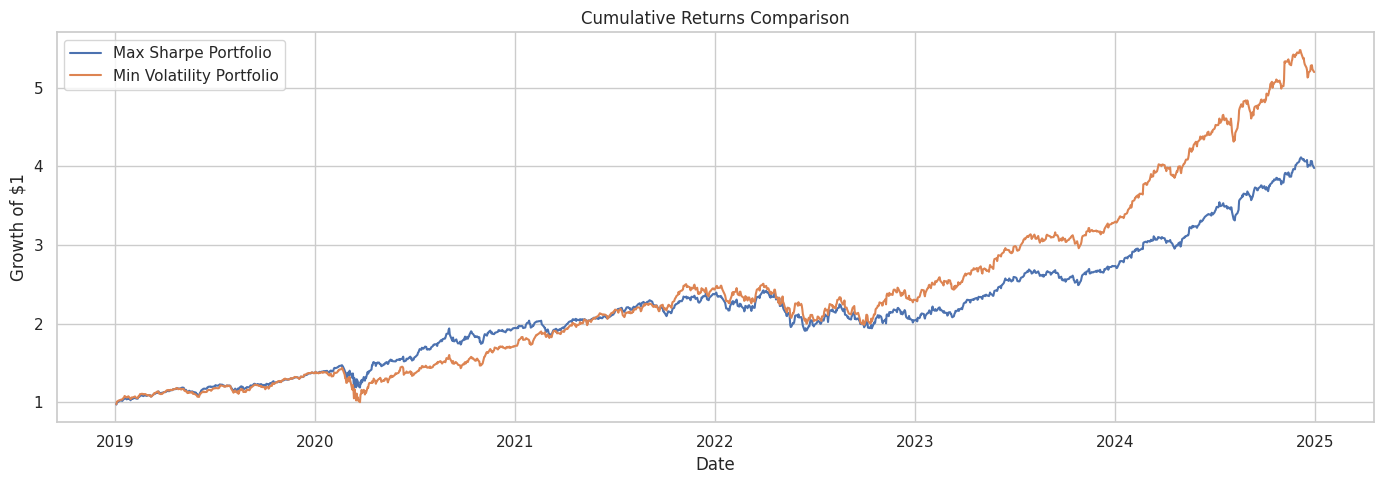

In [17]:
# Plot cumulative returns
plt.figure(figsize=(14, 5))
plt.plot(sharpe_cum, label="Max Sharpe Portfolio")
plt.plot(minvol_cum, label="Min Volatility Portfolio")
plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Compute & plot drawdown**

In [18]:
# Function to compute drawdown
def compute_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown
# Calculate drawdowns
sharpe_dd = compute_drawdown(sharpe_cum)
minvol_dd = compute_drawdown(minvol_cum)

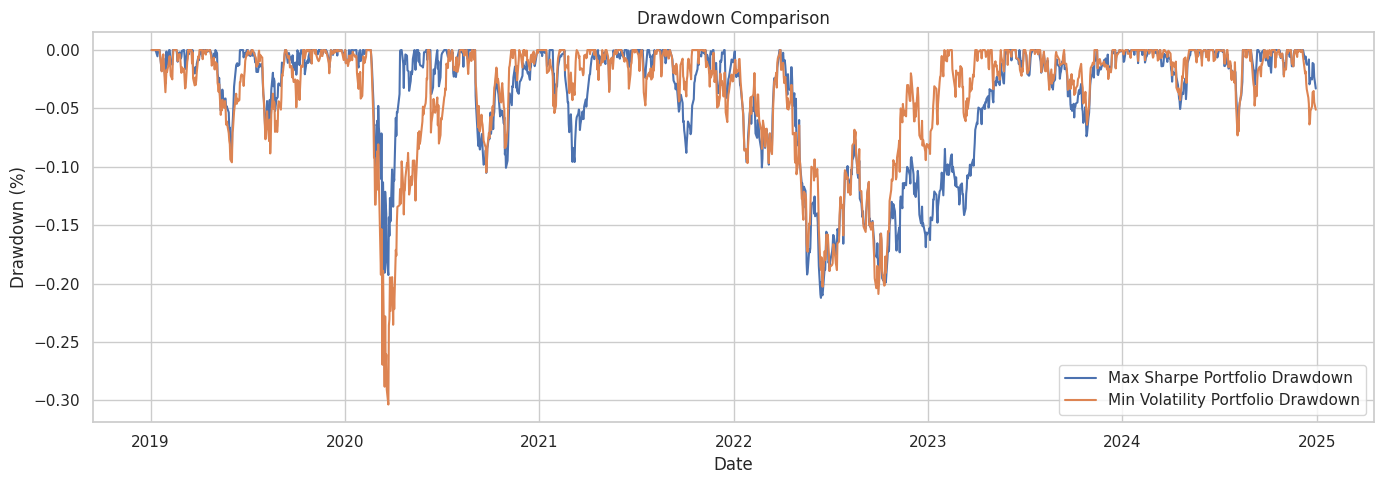

In [19]:
# Plot drawdowns
plt.figure(figsize=(14, 5))
plt.plot(sharpe_dd, label="Max Sharpe Portfolio Drawdown")
plt.plot(minvol_dd, label="Min Volatility Portfolio Drawdown")
plt.title("Drawdown Comparison")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**calculate risk-adjusted performance metrics**

In [20]:
# Function to calculate risk-adjusted performance metrics
def calculate_risk_metrics(returns):
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std()
    volatility = np.sqrt(252) * returns.std()
    cumulative = (1 + returns).cumprod()
    max_drawdown = compute_drawdown(cumulative).min()
    return {
        "Sharpe Ratio": sharpe_ratio,
        "Annual Volatility": volatility,
        "Max Drawdown": max_drawdown
    }

# Get metrics for both portfolios
metrics_sharpe = calculate_risk_metrics(sharpe_returns)
metrics_minvol = calculate_risk_metrics(minvol_returns)

# Show metrics in a clean DataFrame
metrics_df = pd.DataFrame([metrics_sharpe, metrics_minvol], index=["Max Sharpe", "Min Vol"])
print(metrics_df.round(4))


            Sharpe Ratio  Annual Volatility  Max Drawdown
Max Sharpe        1.3308             0.1865       -0.2122
Min Vol           1.3893             0.2150       -0.3035


**Compute portfolio returns**

In [21]:
# Compute portfolio returns
returns_sharpe = returns[weights_sharpe.index] @ weights_sharpe
returns_minvol = returns[weights_minvol.index] @ weights_minvol

# Combine for analysis
combined_returns = pd.DataFrame({
    "Max Sharpe": returns_sharpe,
    "Min Vol": returns_minvol
})

**Rolling returns & plot**

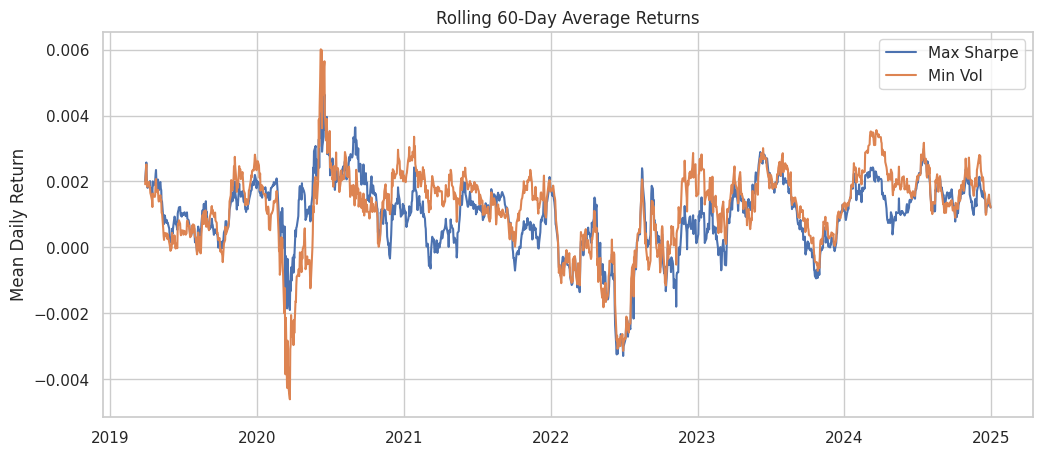

In [22]:
# Rolling returns
rolling_returns = combined_returns.rolling(window=60).mean()
# Rolling returns plot
plt.figure(figsize=(12, 5))
plt.plot(rolling_returns)
plt.title("Rolling 60-Day Average Returns")
plt.ylabel("Mean Daily Return")
plt.grid(True)
plt.legend(rolling_returns.columns)
plt.show()

**Daily return distribution**

/tmp/ipython-input-23-2384965369.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns_sharpe, label="Max Sharpe", shade=True)
/tmp/ipython-input-23-2384965369.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns_minvol, label="Min Vol", shade=True)


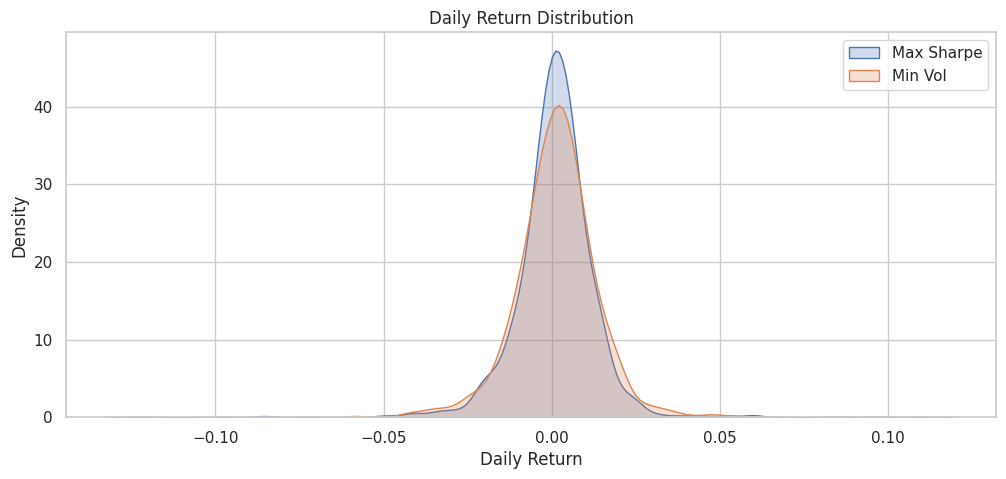

In [23]:
# Return distributions
plt.figure(figsize=(12, 5))
sns.kdeplot(returns_sharpe, label="Max Sharpe", shade=True)
sns.kdeplot(returns_minvol, label="Min Vol", shade=True)
plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.grid(True)
plt.legend()
plt.show()

**Rolling volatility & plot**

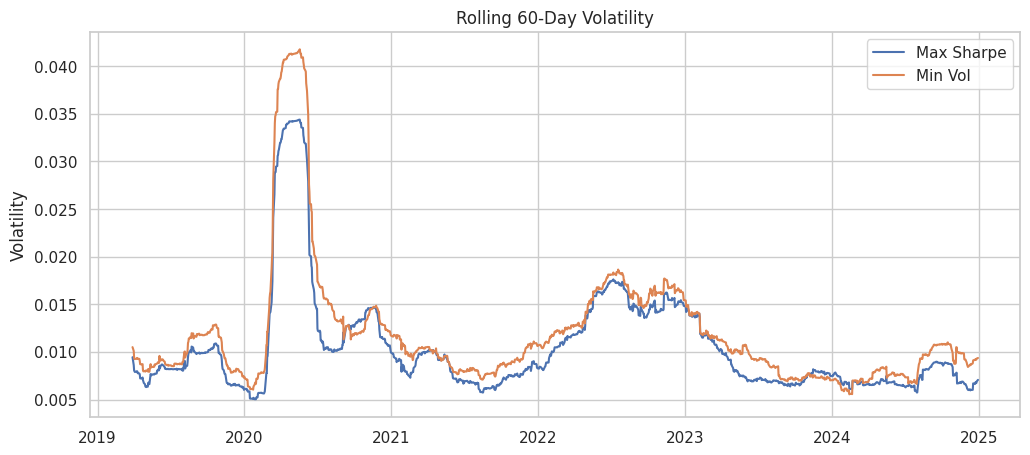

In [24]:
# Rolling volatility
rolling_volatility = combined_returns.rolling(window=60).std()
# Rolling volatility plot
plt.figure(figsize=(12, 5))
plt.plot(rolling_volatility)
plt.title("Rolling 60-Day Volatility")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend(rolling_volatility.columns)
plt.show()

**Rolling Sharpe (assuming risk-free rate = 0) & plot**

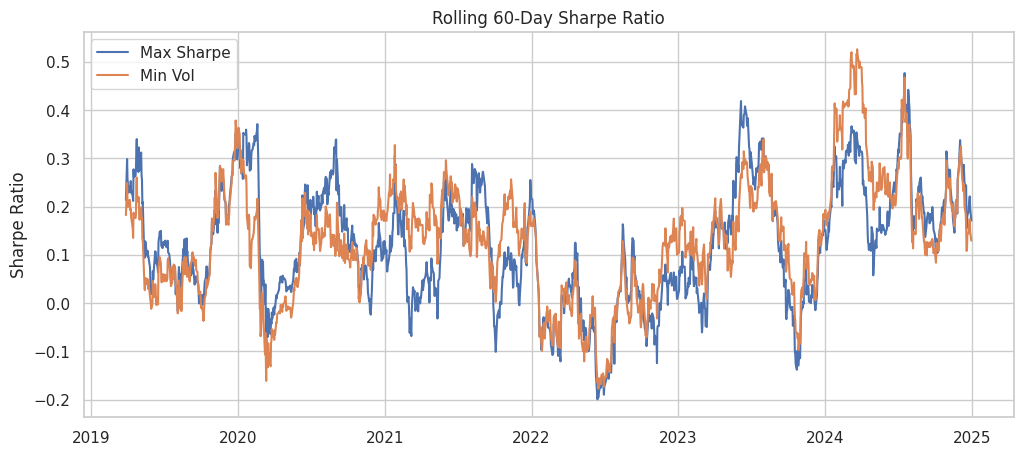

In [25]:
# Rolling Sharpe (assuming risk-free rate = 0)
rolling_sharpe = rolling_returns / rolling_volatility
# Rolling Sharpe Ratio plot
plt.figure(figsize=(12, 5))
plt.plot(rolling_sharpe)
plt.title("Rolling 60-Day Sharpe Ratio")
plt.ylabel("Sharpe Ratio")
plt.grid(True)
plt.legend(rolling_sharpe.columns)
plt.show()

**Portfolio Holdings Breakdown**

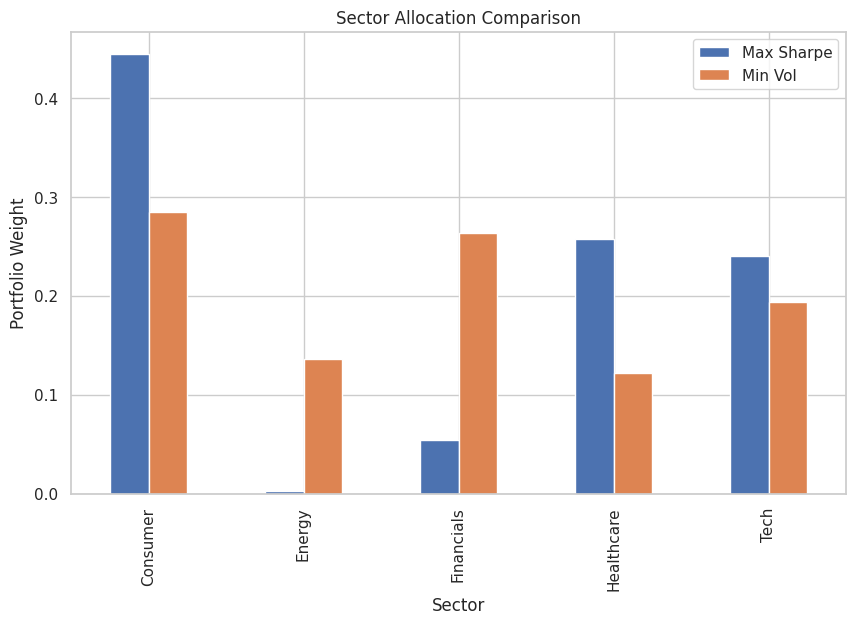

In [26]:
# Portfolio Holdings Breakdown
weights_df = pd.DataFrame({
    "Max Sharpe": weights_sharpe,
    "Min Vol": weights_minvol
})

# Sector data (mocked for now - real mapping needed)
sector_map = {
    'AAPL': 'Tech', 'MSFT': 'Tech', 'AMZN': 'Consumer', 'JPM': 'Financials',
    'GS': 'Financials', 'XOM': 'Energy', 'JNJ': 'Healthcare', 'NVDA': 'Tech',
    'WMT': 'Consumer', 'UNH': 'Healthcare'
}

weights_df['Sector'] = weights_df.index.map(sector_map)

# Group by sector
sector_allocation = weights_df.groupby('Sector')[['Max Sharpe', 'Min Vol']].sum()

# Plot sector allocation
sector_allocation.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Sector Allocation Comparison")
plt.ylabel("Portfolio Weight")
plt.grid(True)
plt.show()


**Compute Drawdowns, Recovery Time, and Peak-to-Peak Durations**

/tmp/ipython-input-31-807247904.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if drawdown[i] < 0:



📌 Portfolio: Max Sharpe
Number of drawdown events ending: 113
Average recovery duration from start of drawdown: 16.90 days
Average peak-to-peak duration: 19.06 days

📌 Portfolio: Min Vol
Number of drawdown events ending: 110
Average recovery duration from start of drawdown: 17.14 days
Average peak-to-peak duration: 19.65 days


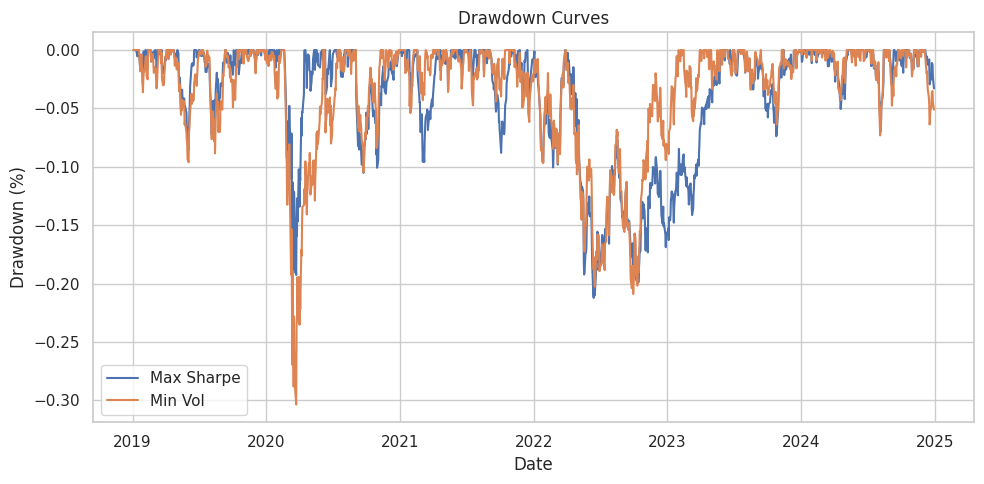

In [31]:
# Function to compute drawdown and recovery
def compute_drawdown_recovery(cumulative_return_series):
    peak = cumulative_return_series.cummax()
    drawdown = (cumulative_return_series - peak) / peak

    recovery_days = []
    peak_to_peak_days = []
    drawdown_start = None
    peak_day = cumulative_return_series.index[0]

    for i in range(1, len(cumulative_return_series)):
        if drawdown[i] < 0:
            if drawdown_start is None:
                drawdown_start = cumulative_return_series.index[i - 1]
        else:
            if drawdown_start is not None:
                recovery_day = cumulative_return_series.index[i]
                recovery_duration = (recovery_day - drawdown_start).days
                total_peak_to_peak = (recovery_day - peak_day).days

                recovery_days.append((drawdown_start, recovery_day, recovery_duration))
                peak_to_peak_days.append((peak_day, recovery_day, total_peak_to_peak))

                # reset
                drawdown_start = None
                peak_day = recovery_day

    return drawdown, recovery_days, peak_to_peak_days

# Compute for both portfolios
drawdown_maxsharpe, recovery_maxsharpe, peak_to_peak_maxsharpe = compute_drawdown_recovery(cumulative_returns['Max Sharpe'])
drawdown_minvol, recovery_minvol, peak_to_peak_minvol = compute_drawdown_recovery(cumulative_returns['Min Vol'])


# Summary stats
for col in cumulative_returns.columns:
    if col == 'Max Sharpe':
      drawdown_periods = recovery_maxsharpe
      recovery_times = peak_to_peak_maxsharpe
    elif col == 'Min Vol':
      drawdown_periods = recovery_minvol
      recovery_times = peak_to_peak_minvol
    else:
      continue

    print(f"\n📌 Portfolio: {col}")
    print(f"Number of drawdown events ending: {len(drawdown_periods)}") # Note: This counts recovery points, not distinct drawdown periods in the traditional sense


    durations = [d[2] for d in drawdown_periods]
    if durations:
        print(f"Average recovery duration from start of drawdown: {np.mean(durations):.2f} days")

    peak_to_peak_durations = [r[2] for r in recovery_times if r[2] is not None]
    if peak_to_peak_durations:
         print(f"Average peak-to-peak duration: {np.mean(peak_to_peak_durations):.2f} days")


# Optional: Visualize drawdowns
plt.figure(figsize=(10, 5))
plt.plot(drawdown_maxsharpe, label='Max Sharpe')
plt.plot(drawdown_minvol, label='Min Vol')
plt.title("Drawdown Curves")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()